IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATASET SELECTION

In [2]:
df=pd.read_csv('sales_data.csv')

ANALYSIS

In [3]:
#display first five records
display(df.head())

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [5]:
display(df.describe())

,price,quantity,revenue
count,367.000000,368.000000,368.000000
mean,211.226158,14.565217,2060.679348
std,227.335170,8.595740,1910.930790
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,300.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


DATA CONDITIONING

In [9]:
duplicates=df.duplicated().sum()
print(f"Number of duplicates:{duplicates}")

Number of duplicates:0


In [8]:
df=df.drop_duplicates()

In [13]:
#handle missing values
print(f"Number of missing values:\n{df.isnull().sum()}")

Number of missing values:
date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64


In [17]:
#fill missing values with mean
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

In [18]:
#after filling
print(f"Number of missing values:\n{df.isnull().sum()}")

Number of missing values:
date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64


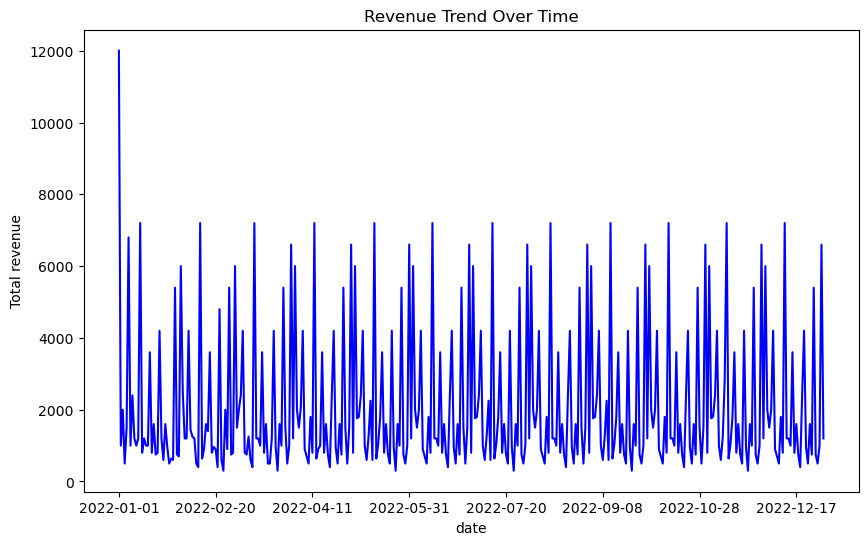

In [21]:
# Plot sales trends over time
plt.figure(figsize=(10, 6))
df.groupby('date')['revenue'].sum().plot(kind='line', color='blue')
plt.title('Revenue Trend Over Time')
plt.xlabel('date')
plt.ylabel('Total revenue')
plt.show()

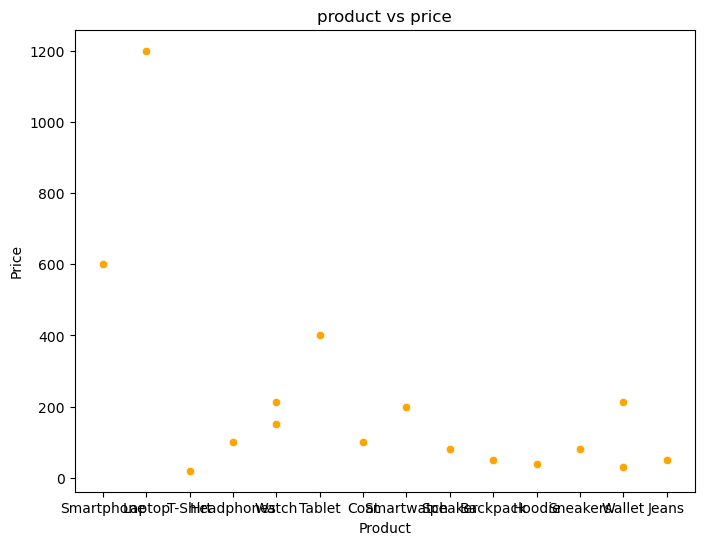

In [ ]:
# Scatter plot: Product vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='product', y='price', data=df, color='orange')
plt.title('product vs price')
plt.xlabel('Product')
plt.ylabel('Price')
plt.show()

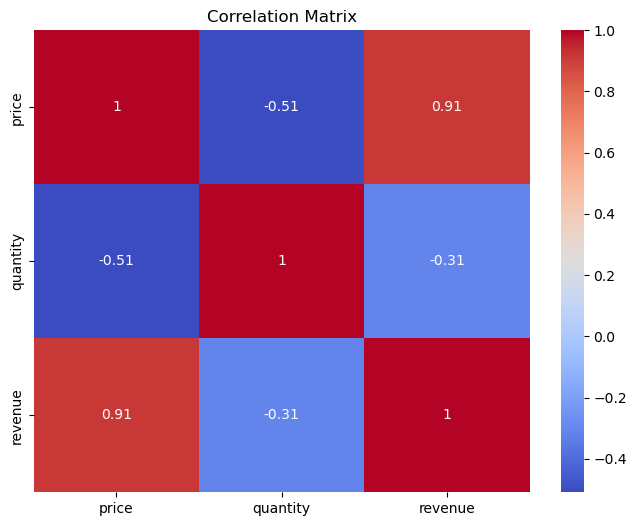

In [24]:
# Heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = df[['price', 'quantity']]
y = df['revenue']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [26]:
# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")


Mean Squared Error: 438715.72
R-squared Score: 0.88
